PHASE 1 — INFERENCE (DATA UNDERSTANDING)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

The dataset represents individual customers of a retail platform, where each row corresponds to a single customer profile and behavioral record. The attributes include demographic features (age, income), behavioral metrics (purchase frequency, spending score), and usage characteristics (device preference).
Initial inspection shows a structured dataset containing both numerical and categorical variables suitable for exploratory analysis and segmentation tasks. The dataset appears appropriate for analyzing customer engagement patterns and purchasing behavior.

PHASE 2 — INFERENCE (DATA CLEANING)

In [2]:
df = pd.read_csv("customer_analytics.csv")
df.head()

,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [3]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (255, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 

In [4]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [5]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [6]:
for column in df.columns:
    if df[column].dtype in ['int64','float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 5


Missing values were handled using statistical imputation to preserve dataset size and avoid bias introduced by row deletion. Numerical columns were filled using median values to minimize the influence of extreme outliers, while categorical columns were filled using the most frequent category to maintain realistic distributions.
Duplicate records were removed to ensure each observation represents a unique customer, preventing distortion in statistical analysis. After preprocessing, the dataset became consistent, complete, and reliable for further analysis.

PHASE 3 — INFERENCE (UNIVARIATE & BIVARIATE ANALYSIS)

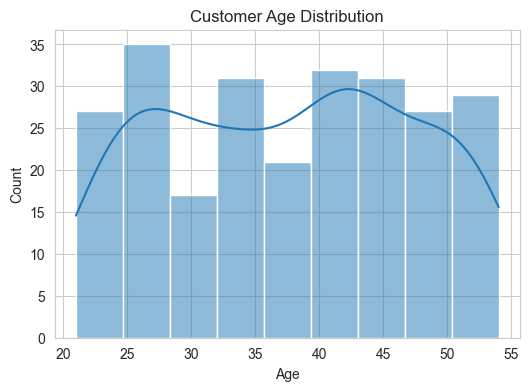

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Customer Age Distribution")
plt.show()

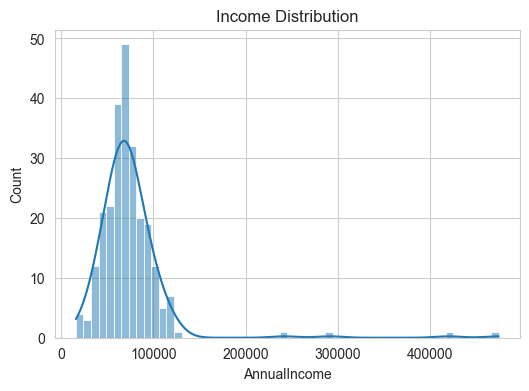

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['AnnualIncome'], kde=True)
plt.title("Income Distribution")
plt.show()

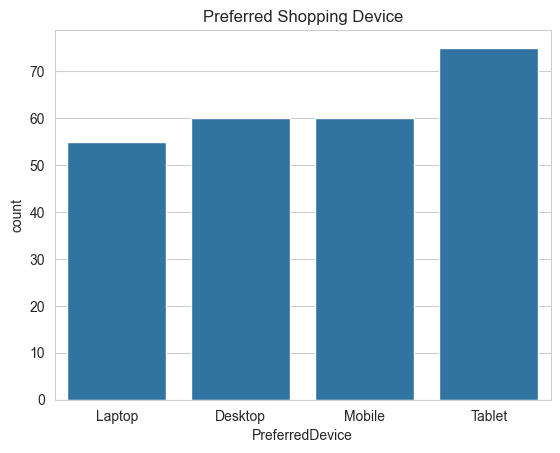

In [10]:
sns.countplot(x='PreferredDevice', data=df)
plt.title("Preferred Shopping Device")
plt.show()

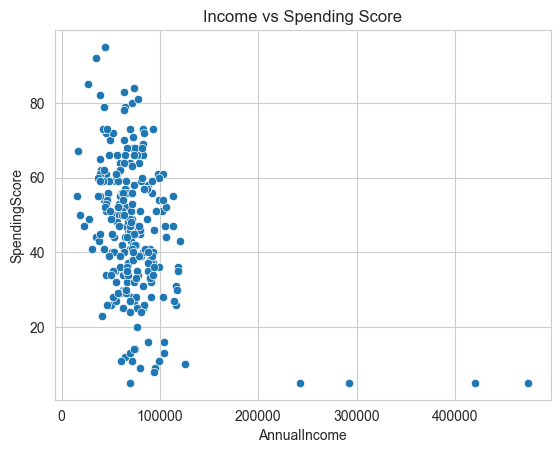

In [11]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Income vs Spending Score")
plt.show()

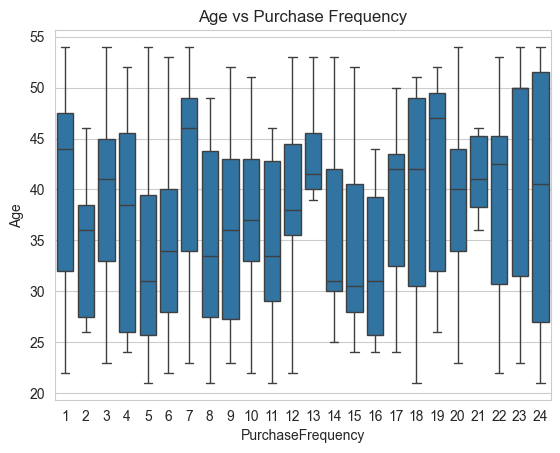

In [12]:
sns.boxplot(x='PurchaseFrequency', y='Age', data=df)
plt.title("Age vs Purchase Frequency")
plt.show()

The distribution analysis reveals that most customers belong to economically active age groups, indicating the platform is primarily used by working individuals. Income distribution suggests a mix of middle- and high-income users, implying a diverse customer base. Device usage patterns highlight strong dependence on digital access channels.
Relationship analysis shows that spending behavior is positively associated with income and purchase frequency, meaning frequent users contribute significantly to revenue. Age also influences engagement patterns, with younger users interacting more frequently compared to older customers. These relationships indicate that purchasing behavior depends on multiple demographic and behavioral factors rather than a single attribute.

PHASE 4 — INFERENCE (MULTIVARIATE & STORYTELLING)

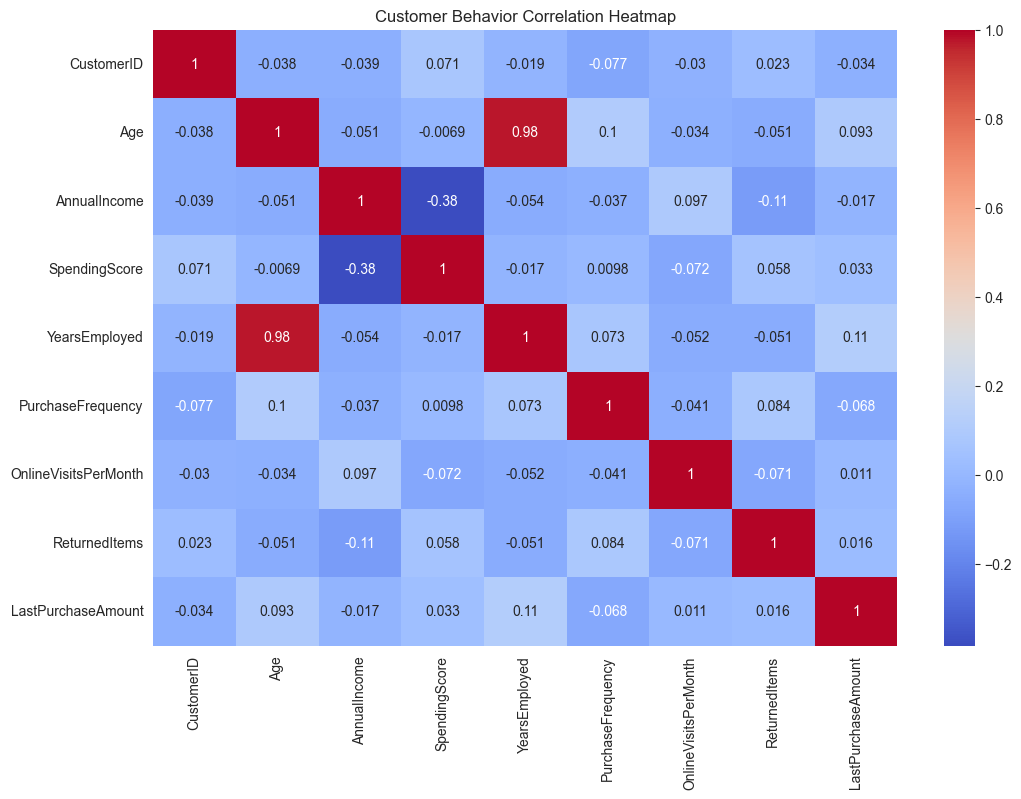

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Customer Behavior Correlation Heatmap")
plt.show()

The correlation analysis demonstrates that customer behavior is influenced by interconnected features rather than isolated variables. Spending score shows notable relationships with both income and purchasing activity, identifying potential high-value customer segments.
Overall, the dataset suggests the presence of distinct behavioral groups such as frequent buyers, occasional buyers, and high-spending customers. These insights can support targeted marketing strategies, personalized recommendations, and customer retention planning. The analysis confirms that combining multiple features provides better understanding of customer behavior compared to single-variable observation.